In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable


from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [2]:
#Parameters

cmap = plt.get_cmap('nipy_spectral')
cmap.set_bad('burlywood')

H = 24 #One day in hours

#Ariane parameters
tunit= 3600

outint = 20 * 60 # 20 min in seconds

pph = int(tunit / outint) #points per hour

lmt = 1896 #points per particle


#RUN parameters

nday= 50

basedir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

plotsdir = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/plots"


position = nday * pph * H # d * num/h * h/d = num

In [3]:
#function to get points from an indiviual month

def get_pts(direct):
    
    points = []
    
    particle = 1 #start particle counter
    
    start = dt.datetime.now()
    print ("start {}: ".format(direct), start)


    with open(basedir + direct + "/traj.txt") as file:

        for i, line in enumerate(file):

            line = line.strip('\n').split()

            line = [float(k) for k in line]


            if line[0] == particle:
                index = i + position
                particle += 1

            if i == index:
                points.append (line)
                
        print ("time: ", dt.datetime.now() - start)
                
                
    return points

In [4]:
# # test cell

# year0 = year1 = year2 = [] #for each depth

# jan = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160101_20160131_427d/")

# feb = get_pts("/ocean/gsgarbi/analysis-giorgio/time_series/results2016/20160201_20160229_401d/")


# year0 = jan[0::3] + feb[0::3]
# year1 = jan[1::3] + feb[1::3]
# year2 = jan[2::3] + feb[2::3]



In [5]:
# Get points for the year - this process should take about 42min for 12 months (3.5min per month)

path = "/ocean/gsgarbi/analysis-giorgio/time_series/results2016/"

dirs = os.listdir( path )

dirs.sort()


    


In [6]:
def plot(points):
    
    plt.clf()
    
    #prepare plot

    start = dt.datetime.now()
    print ("start: ", start)


    # In[7]:



    np.shape(points)


    # In[8]:

    # set up array of zeros of shape of model domain; also load tmask, model lons and lats
    mesh = nc.Dataset("/ocean/gsgarbi/mesh_mask_downbyone2.nc")
    tmask=np.copy(mesh.variables['tmask'])
    mesh.close()
    fb=nc.Dataset('/ocean/eolson/MEOPAR/NEMO-forcing/grid/bathy_downonegrid2.nc')
    nav_lon=np.copy(fb.variables['nav_lon'])
    nav_lat=np.copy(fb.variables['nav_lat'])
    fb.close()


    # In[9]:

    tmask.shape


    # In[10]:

    griddata=0.0*tmask[0,0,:,:]
    griddata.shape


    # In[11]:

    np.shape(points)[0]


    # In[12]:

    for ii in range(0,np.shape(points)[0]):
        j,i=geo_tools.find_closest_model_point(points[ii,1],points[ii,2],nav_lon,nav_lat)
        #print(points[ii,1],points[ii,2],j,i)
        griddata[j,i]=griddata[j,i]+1


    # In[13]:

    fig, axs = plt.subplots(1,1,figsize=(9,8))
    mesh0 = axs.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==0,griddata),cmap=cmap)

    viz_tools.set_aspect(axs,coords='map')


    # In[14]:

    # model grid is too small. use hist2d for larger bins, then overlay grid


    # In[15]:

    lonlim=[np.min(nav_lon),np.max(nav_lon)]
    latlim=[np.min(nav_lat),np.max(nav_lat)]

    griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])


    # In[16]:

    Jedges,Iedges=np.meshgrid(jedges,iedges)


    # In[17]:

    Jedges.shape


    # In[18]:

    griddata.shape


    # In[19]:

    xl=(-125,-122.4)
    yl=(48,50)
    fig, axs = plt.subplots(1,1,figsize=(9,8))
    mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)
    axs.set_xlim(xl)
    axs.set_ylim(yl)
    #axs.plot(-124.0,49.5,'r*')
    viz_tools.set_aspect(axs,coords='map')
    pos=axs.get_position()
    axs2 = plt.axes(pos)
    mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')
    axs2.set_xlim(xl)
    axs2.set_ylim(yl)
    axs2.patch.set_alpha(0)
    viz_tools.set_aspect(axs2,coords='map')


    print ("time: ", dt.datetime.now() - start)

    plt.clf()

    Iona = (-123.30898284912109, 49.187351226806641)
    S15 = (-123.3114, 49.130412)
    S16 = (-123.317415, 49.1214)


    lonlim=[np.min(nav_lon),np.max(nav_lon)]
    latlim=[np.min(nav_lat),np.max(nav_lat)]

    griddata, iedges, jedges = np.histogram2d(points[:,1],points[:,2],bins=[100,200],range=[lonlim,latlim])




    Jedges,Iedges=np.meshgrid(jedges,iedges)




    Jedges.shape




    griddata.shape




    xl=(-125,-122.4)
    yl=(48,50)
    fig, axs = plt.subplots(1,1,figsize=(9,8))



    mesh0 = axs.pcolormesh(Iedges,Jedges,griddata,cmap=cmap)

    #-----------


    # Make plot with vertical (default) colorbar


    data = griddata

    cax = axs.imshow(data, interpolation='nearest')
    axs.set_title("Density plot for final positions after {} days\n".format(nday) +
              "26280 particles. 3 per hour in 2016. Initial depths(m): ")

    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    cbar = fig.colorbar(cax)
      # vertically oriented colorbar

    cbar.set_label ("Counts")

    #------------

    axs.set_xlim(xl)
    axs.set_ylim(yl)
    #axs.plot(-124.0,49.5,'r*')
    viz_tools.set_aspect(axs,coords='map')

    pos=axs.get_position()
    axs2 = plt.axes(pos)
    mesh1=axs2.pcolormesh(nav_lon,nav_lat,np.ma.masked_where(tmask[0,0,:,:]==1,tmask[0,0,:,:]),cmap='YlOrRd')



    axs2.set_xlim(xl)
    axs2.set_ylim(yl)
    axs2.patch.set_alpha(0)


    el = Ellipse((2, -1), 0.5, 0.5)

    axs2.annotate(
            "IONA",
            xy=(Iona[0], Iona[1]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='bottom', color = (0.937, 0.439, 0.043),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                      fc=(1,1,1), ec=(1., .5, .5),
                                      patchA=None,
                                      patchB=el,
                                      relpos=(0.2, 0.8),
                                      connectionstyle="arc3,rad=-0.1"))


    axs2.annotate(
            "STATION 15",
            xy=(S15[0],S15[1]), xytext=(50, 10),
                textcoords='offset points', ha='left', va='bottom', color = "blue",
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                      fc=(1,1,1), ec=(1., .5, .5),
                                      patchA=None,
                                      patchB=el,
                                      relpos=(0.2, 0.8),
                                      connectionstyle="arc3,rad=-0.1"))

    axs2.annotate(
            "STATION 16",
            xy=(S16[0],S16[1]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='top', color = 'blue',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                              arrowprops=dict(arrowstyle="wedge,tail_width=1.",
                                      fc=(1,1,1), ec=(1., .5, .5),
                                      patchA=None,
                                      patchB=el,
                                      relpos=(0.2, 0.8),
                                      connectionstyle="arc3,rad=-0.1"))



    axs2.annotate(
            "JUAN DE FUCA",
            xy=(-124,48.21), xytext=(50, 10),
            textcoords='offset points', ha='left', va='top', color = 'white')

    viz_tools.set_aspect(axs2,coords='map')

In [7]:
dirs.sort()
winter = []
fall = []
summer = []
spring = []

In [8]:
for file in dirs[0:3]:
    month = get_pts(file)
    winter += month

start 20160101_20160131_427d:  2017-04-18 02:19:30.604327
time:  0:02:18.834476
start 20160201_20160229_401d:  2017-04-18 02:21:49.438993
time:  0:02:05.346069
start 20160301_20160331_355d:  2017-04-18 02:23:54.785609
time:  0:01:58.260039


In [9]:
for file in dirs[3:6]:
    month = get_pts(file)
    spring += month

start 20160401_20160430_325d:  2017-04-18 02:25:53.050360
time:  0:01:46.155194
start 20160501_20160531_294d:  2017-04-18 02:27:39.206291
time:  0:01:36.412095
start 20160601_20160630_264d:  2017-04-18 02:29:15.618724
time:  0:01:23.645666


In [12]:
for file in dirs[6:9]:
    month = get_pts(file)
    summer += month

start 20160701_20160731_252d:  2017-04-18 02:33:44.940357
time:  0:01:20.834891
start 20160801_20160831_217d:  2017-04-18 02:35:05.776056
time:  0:01:09.031297
start 20160901_20160930_172d:  2017-04-18 02:36:14.808486
time:  0:00:53.897535


In [13]:

for direct in dirs[9:12]:
    mon = get_pts(direct)
    fall += mon

start 20161001_20161031_141d:  2017-04-18 02:37:08.711428
time:  0:00:44.618880
start 20161101_20161130_111d:  2017-04-18 02:37:53.331364
time:  0:00:32.913238
start 20161201_20161231_95d:  2017-04-18 02:38:26.245544
time:  0:00:29.209055


start:  2017-04-18 02:38:55.467985
time:  0:00:09.173992


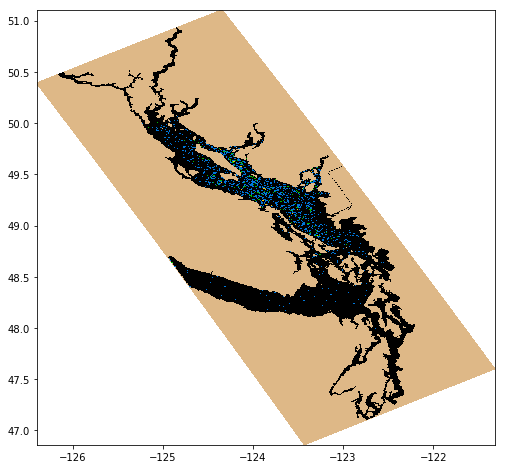

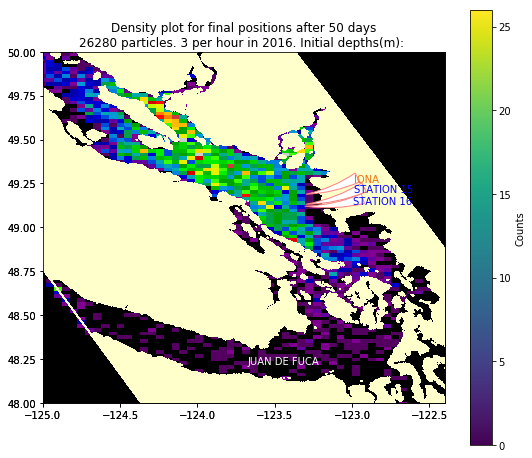

In [14]:

points = np.array(winter) #back to original name. convert to np.array

plot (points)

start:  2017-04-18 02:39:05.597867
time:  0:00:08.906271


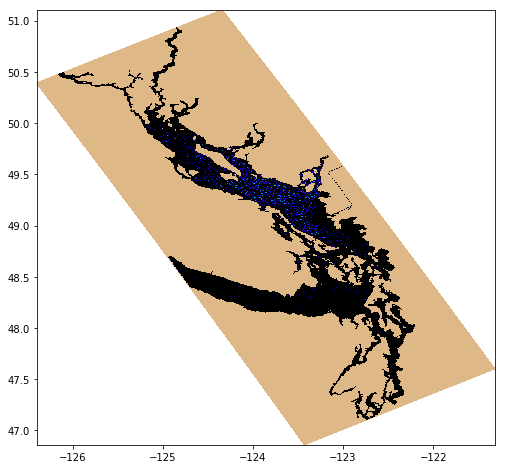

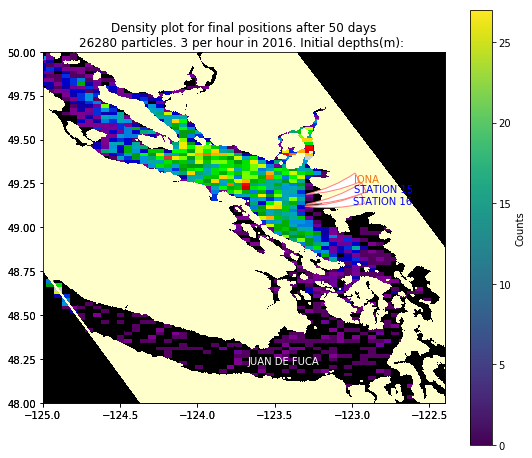

In [15]:

points = np.array(spring) #back to original name. convert to np.array

plot (points)

start:  2017-04-18 02:39:15.440964
time:  0:00:14.692811


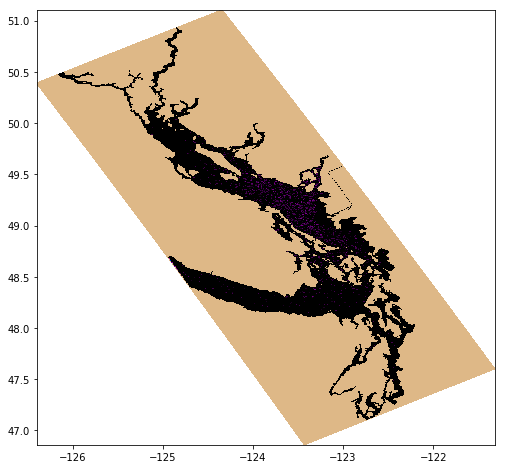

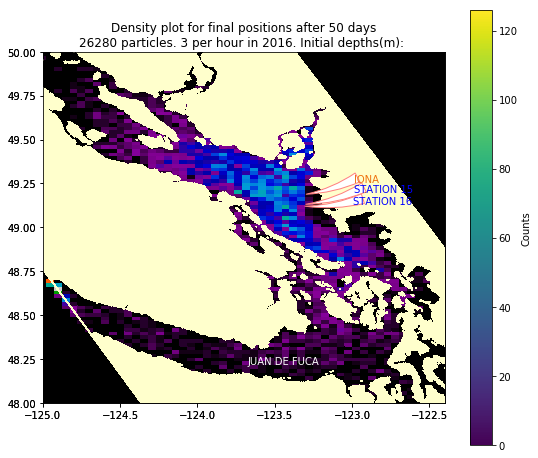

In [16]:

points = np.array(summer) #back to original name. convert to np.array

plot (points)

start:  2017-04-18 02:39:31.078660
time:  0:00:09.184426


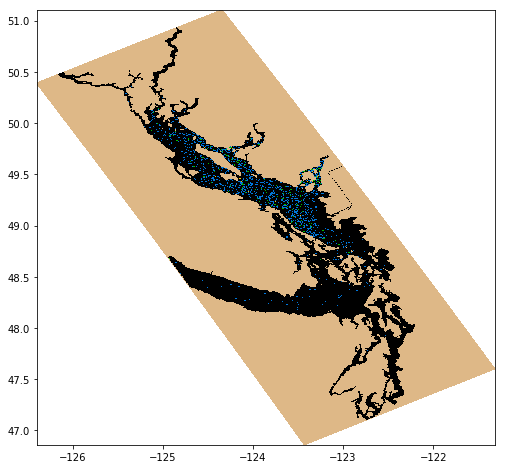

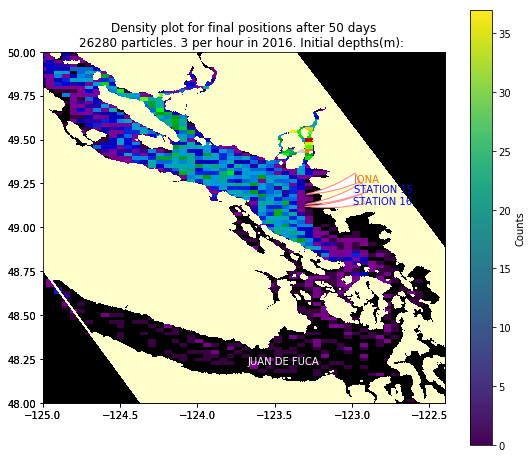

In [17]:
points = np.array(fall) #back to original name. convert to np.array

plot (points)